# K-Means Clustering

## Pengertian K-Means Clustering

K-Means clustering adalah algoritma unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa kelompok atau klaster berdasarkan kesamaan fitur atau karakteristik. Algoritma ini berusaha untuk meminimalkan jarak antara titik data dan pusat klaster (centroid) mereka, sehingga data dengan karakteristik yang sama akan dikelompokkan atau dijadikan satu klaster.


## Tujuan dan Cara Kerja

Tujuan dari K-Means Clustering adalah mengelompokkan data menjadi beberapa kelompok (kluster) sehingga data dalam satu kluster memiliki karakteristik yang mirip, sementara data antar kluster memiliki karakteristik yang berbeda. K-Means clustering sering digunakan dalam berbagai bidang, seperti segmentasi gambar, segmentasi pelanggan, riset pasar, dan pengelompokan dokumen.

**Cara Kerja:**
- Mengumpulkan atau menyiapkan data yang ingin dikelompokkan.
- Menentukan jumlah klaster yang diinginkan.
- Inisialisasi centroid secara acak.
- Memberi label klaster pada setiap titik data berdasarkan jarak terdekat ke centroid.
- Menghitung centroid baru dengan mengambil nilai rata-rata dari semua titik data yang masuk dalam klaster tersebut.
- Melakukan iterasi langkah 3 dan 4 hingga centroid tidak berubah secara signifikan atau mencapai kriteria konvergensi.



## Inertia (Sum Square error/SSE)


Dalam konteks algoritma K-Means Clustering, inertia (juga dikenal sebagai Sum of Squared Errors/SSE) merupakan metrik evaluasi yang digunakan untuk menilai kualitas pengelompokan data ke dalam klaster. Nilai ini menggambarkan total jumlah kuadrat jarak antara setiap titik data dan pusat klaster (centroid) yang menaunginya. Semakin kecil nilai inertia, semakin baik data tersebar rapat di sekitar centroid masing-masing klaster.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## Silhouette Analysis


Silhouette Analysis merupakan metrik evaluasi alternatif yang sering dianggap lebih unggul dibandingkan inertia dalam banyak kasus untuk menilai hasil clustering, seperti pada algoritma K-Means. Hal ini karena Silhouette Analysis mempertimbangkan dua aspek secara bersamaan, yaitu:

- Seberapa rapat data dalam satu klaster (kepadatan internal)

- Seberapa jauh klaster tersebut dari klaster lainnya (pemisahan antar klaster)

Silhouette Analysis mengukur seberapa mirip suatu titik data dengan klasternya sendiri dibandingkan dengan klaster terdekat lainnya. Rumusnya adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data


## Implementasi K-Means dengan menggunakan data Iris**

In [18]:
%pip install pymysql
%pip install psycopg2

### Library yang digunakan

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

###Pengumpulan Data

In [20]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-8eb1f4b-posgresqltugas2.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ycUbNT1QT31C8JC_cFL",
        database="defaultdb",
        port=10681
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_progres")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="posgresqltugas2-sqltugas2.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_wYxnNK8agAOz67Wu1Ok",
        database="amelia",
        port=12195
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)


# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width
  1     Iris-setosa          14.0         20.0          51.0         35.0
  2     Iris-setosa          14.0         20.0          40.9         30.0
  3     Iris-setosa          13.0         20.0          47.0         32.0
  4     Iris-setosa          15.0         20.0          46.0         31.0
  5     Iris-setosa          14.0         20.0          50.0         36.0
  6     Iris-setosa           1.7          0.4          54.0         39.0
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

### Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 2, 3 dan 4

In [21]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi clustering
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print(f"Centroids:\n{centroids}")
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 4. Jalankan clustering
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)


Hasil K-Means dengan 2 Klaster:
Centroids:
[[-0.35067757 -0.35402156 -0.2897297  -0.32410545]
 [ 2.74353628  2.76969805  2.26670884  2.53564856]]
Akurasi (Adjusted Rand Score): -0.003

Hasil K-Means dengan 3 Klaster:
Centroids:
[[-0.35067757 -0.35402156 -0.2897297  -0.32410545]
 [ 3.03360203  2.59586461  3.62535119  2.77172945]
 [ 2.32915664  3.01803154  0.3257912   2.19839014]]
Akurasi (Adjusted Rand Score): 0.003

Hasil K-Means dengan 4 Klaster:
Centroids:
[[-0.35067757 -0.35402156 -0.2897297  -0.32410545]
 [ 3.03360203  2.59586461  3.62535119  2.77172945]
 [ 2.03117293  2.96386673  0.55843734  3.20307352]
 [ 3.07411591  3.15344357 -0.25582415 -0.31331833]]
Akurasi (Adjusted Rand Score): 0.002


### Model Plotting dengan Jumlah Cluster 2, 3 dan 4

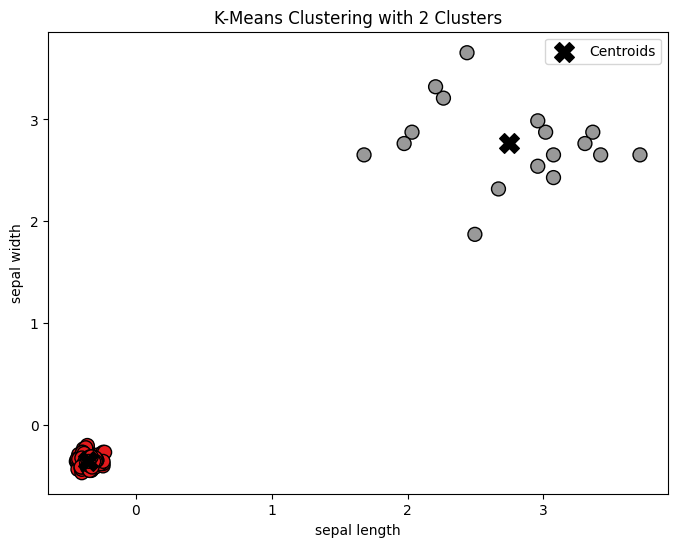

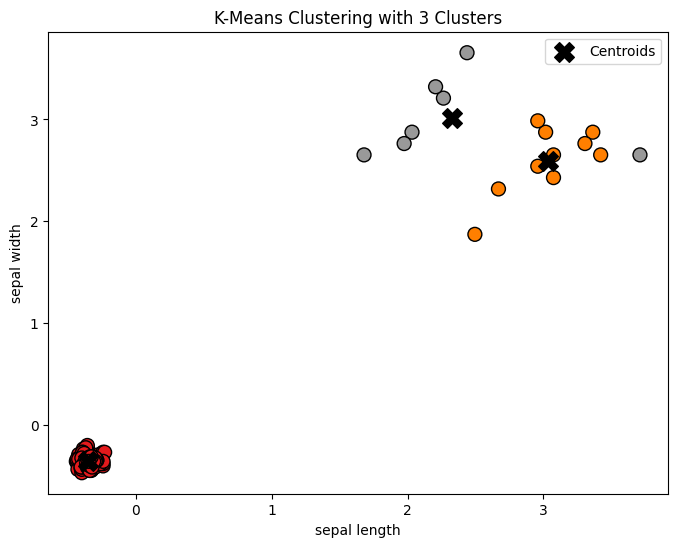

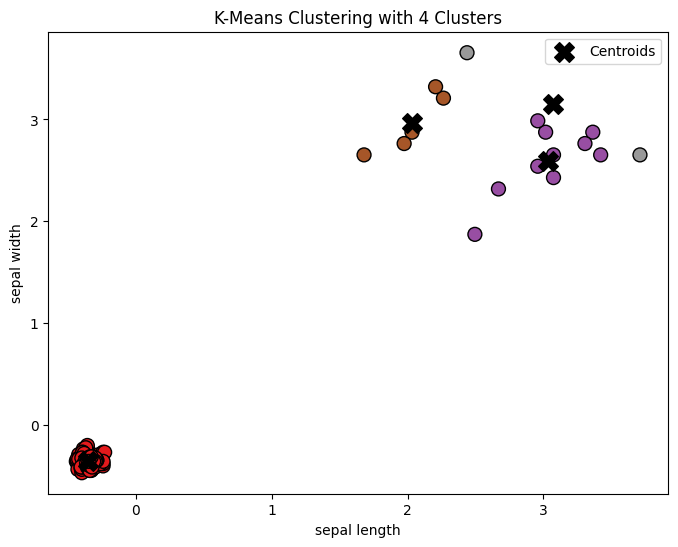

In [22]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means, plotting dan menampilkan centroid
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Plotting data dan centroid
    plt.figure(figsize=(8, 6))

    # Scatter plot untuk 2 fitur pertama (sepal length & sepal width)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1', marker='o', edgecolors='k', s=100)

    # Plot centroid dengan warna berbeda
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# 4. Melakukan clustering dengan K=2, K=3, dan K=4 dan plot hasilnya
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)


### Menghitung Inertia untuk Jumlah Cluster 2, 3 dan 4

In [23]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk menghitung inertia secara manual
def calculate_inertia_step_by_step(X_scaled, labels, centroids):
    inertia = 0
    print("Langkah-langkah perhitungan Inertia:")

    for i in range(len(X_scaled)):
        cluster = labels[i]
        distance = np.linalg.norm(X_scaled[i] - centroids[cluster]) ** 2
        inertia += distance
        print(f"Titik data {i+1} (Fitur: {X_scaled[i]}), Klaster: {cluster}, "
              f"Centroid: {centroids[cluster]}, Jarak kuadrat: {distance:.3f}, "
              f"Inertia sementara: {inertia:.3f}")

    return inertia

# 4. Fungsi untuk menjalankan KMeans dan menghitung inertia manual
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids (fitur hasil standarisasi):\n{centroids}")

    # Hitung inertia manual
    manual_inertia = calculate_inertia_step_by_step(X_scaled, labels, centroids)
    print(f"\nTotal Inertia Manual: {manual_inertia:.3f}")

    # Bandingkan dengan inertia dari sklearn
    sklearn_inertia = kmeans.inertia_
    print(f"Inertia dari sklearn: {sklearn_inertia:.3f}")
    print("="*50)

    return labels, centroids, manual_inertia

# 5. Jalankan untuk k=2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



=== Hasil K-Means dengan 2 Klaster ===
Centroids (fitur hasil standarisasi):
[[-0.35067757 -0.35402156 -0.2897297  -0.32410545]
 [ 2.74353628  2.76969805  2.26670884  2.53564856]]
Langkah-langkah perhitungan Inertia:
Titik data 1 (Fitur: [2.26383834 3.20920147 0.55843734 3.20307352]), Klaster: 1, Centroid: [2.74353628 2.76969805 2.26670884 2.53564856], Jarak kuadrat: 3.787, Inertia sementara: 3.787
Titik data 2 (Fitur: [1.67928096 2.65162251 0.55843734 3.20307352]), Klaster: 1, Centroid: [2.74353628 2.76969805 2.26670884 2.53564856], Jarak kuadrat: 4.510, Inertia sementara: 8.297
Titik data 3 (Fitur: [2.03233047 2.87465409 0.4757712  3.20307352]), Klaster: 1, Centroid: [2.74353628 2.76969805 2.26670884 2.53564856], Jarak kuadrat: 4.170, Inertia sementara: 12.467
Titik data 4 (Fitur: [1.9744535  2.7631383  0.64110348 3.20307352]), Klaster: 1, Centroid: [2.74353628 2.76969805 2.26670884 2.53564856], Jarak kuadrat: 3.680, Inertia sementara: 16.146
Titik data 5 (Fitur: [2.20596138 3.32071

### Model Plotting Diagram Elbow Method

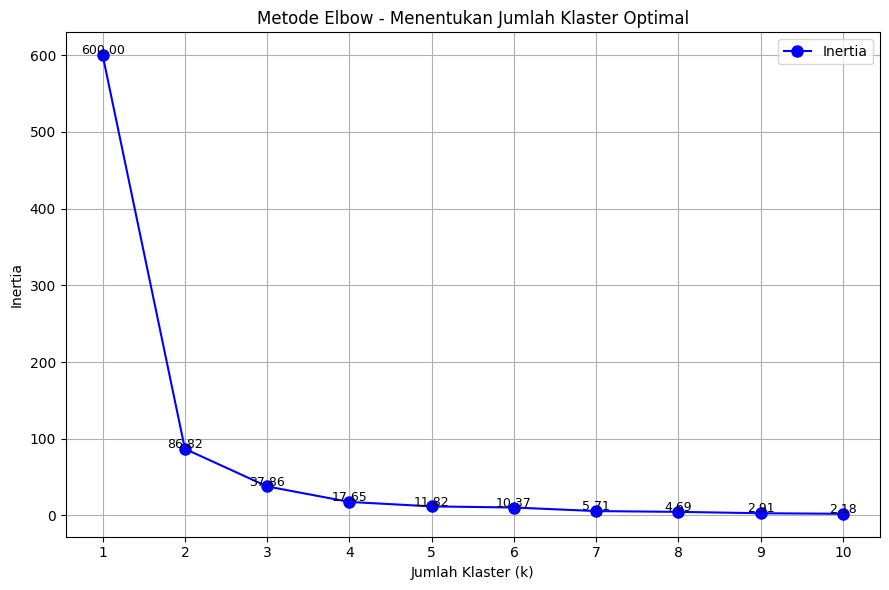

In [24]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Hitung inertia untuk berbagai nilai k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Plot Elbow Diagram
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'bo-', markersize=8, label='Inertia')
plt.title("Metode Elbow - Menentukan Jumlah Klaster Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)

# Tambahkan label inertia di tiap titik
for i, inertia in enumerate(inertias):
    plt.text(K_range[i], inertias[i] + 1, f"{inertia:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

### Menghitung Silhouette Score untuk Jumlah Cluster 2, 3 dan 4


=== Hasil K-Means dengan 2 Klaster ===
Centroids:
[[-0.35067757 -0.35402156 -0.2897297  -0.32410545]
 [ 2.74353628  2.76969805  2.26670884  2.53564856]]
Silhouette Score untuk 2 klaster: 0.910

=== Hasil K-Means dengan 3 Klaster ===
Centroids:
[[-0.35067757 -0.35402156 -0.2897297  -0.32410545]
 [ 3.03360203  2.59586461  3.62535119  2.77172945]
 [ 2.32915664  3.01803154  0.3257912   2.19839014]]
Silhouette Score untuk 3 klaster: 0.909

=== Hasil K-Means dengan 4 Klaster ===
Centroids:
[[-0.35067757 -0.35402156 -0.2897297  -0.32410545]
 [ 3.03360203  2.59586461  3.62535119  2.77172945]
 [ 2.03117293  2.96386673  0.55843734  3.20307352]
 [ 3.07411591  3.15344357 -0.25582415 -0.31331833]]
Silhouette Score untuk 4 klaster: 0.918

>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = 4 (dengan score = 0.918)


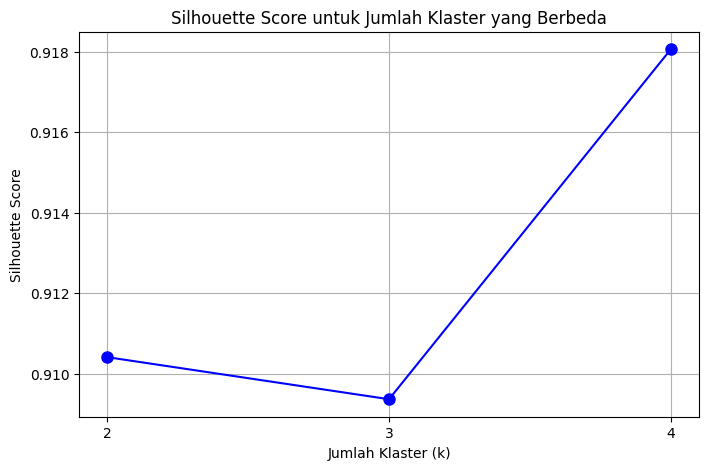

In [25]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means dan menghitung Silhouette Score
def perform_kmeans_with_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Output hasil untuk klaster k
    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids:\n{centroids}")
    print(f"Silhouette Score untuk {k} klaster: {silhouette_avg:.3f}")

    return silhouette_avg

# 4. Melakukan clustering dan menghitung Silhouette Score untuk k=2, 3, dan 4
silhouette_scores = []
k_values = [2, 3, 4]

for k in k_values:
    score = perform_kmeans_with_silhouette(X_scaled, k)
    silhouette_scores.append(score)

# 5. Menentukan k dengan Silhouette Score terbaik
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\n>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = {best_k} (dengan score = {best_score:.3f})")

# 6. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.title("Silhouette Score untuk Jumlah Klaster yang Berbeda")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()